In [2]:
import alborex_functions
import alborexdata
import netCDF4
import glob
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np
import datetime
import cmocean
import scipy.io as sio
from importlib import reload

## Configuration

In [4]:
with open('alborexconfig.json') as json_data_file:
    config = json.load(json_data_file)

Domain

In [89]:
coordinates = config["domain"]["coordinates1"]
coordinates2 = config["domain"]["coordinates2"]

In [9]:
datadir = config["datadirs"]["adcp"]
datafilelist = sorted(glob.glob(os.path.join(datadir, "*.mat")))

Front

In [90]:
frontcoords = "../data/front_coordinates.dat"
f = alborexdata.Front()
f.get_from_file(frontcoords)
f.smooth()

## Figure

In [71]:
m = Basemap(projection='merc', llcrnrlon=coordinates2[0], llcrnrlat=coordinates2[2],
            urcrnrlon=coordinates2[1], urcrnrlat=coordinates2[3],
            lat_ts=0.5 * (coordinates2[2] + coordinates2[3]), resolution='h')

In [171]:
class Adcp(object):
    
    """
    Stores ADCP transects
    """
    
    def __init_(self, lon=None, lat=None, depth=None, u=None, v=None):
        self.lon = lon
        self.lat = lat
        self.depth = depth
        self.u = u
        self.v = v
        
    def read_adcp_matfile(self, filename):
        """
        Read the coordinates (lon, lat, depth) and 
        the velocity components from the .matfile
        """
        # Read the mat file
        dataadcp = sio.loadmat(filename)

        self.lon = dataadcp["AnFLonDeg"]
        self.lat = dataadcp["AnFLatDeg"]
        self.u = dataadcp["SerEmmpersec"]
        self.v = dataadcp["SerNmmpersec"]
        ndepth = self.u.shape[1]
        depthmin = 16.
        deltadepth = 8.
        depthmax = depthmin + (ndepth - 1) * deltadepth
        self.depth = np.linspace(depthmin, depthmax, int(nbins))    

### One subplot per file

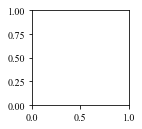

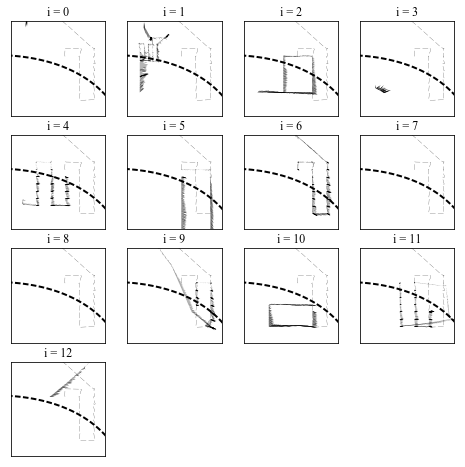

In [172]:
fig = plt.figure(figsize=(8, 8))
i = 0
for datafile in datafilelist:
    ax = plt.subplot(4,4,i+1)

    adcp = Adcp()
    adcp.read_adcp_matfile(datafile)

    llon, llat = m(adcp.lon, adcp.lat)
    m.plot(lon, lat, "k--", lw=.2, latlon=True)
    plt.quiver(llon, llat, adcp.u[:,0], adcp.v[:,0], headwidth=1)
    m.plot(f.lon, f.lat, "k--", linewidth=2, latlon=True)
    ax.set_title("i = {}".format(i))
    i += 1
plt.show()
plt.close()

### Plot selected sections

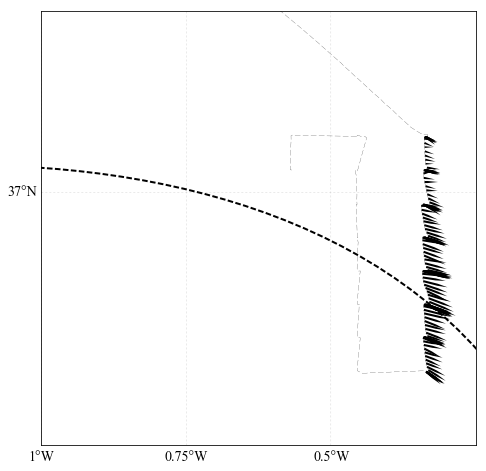

In [114]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
datafile = datafilelist[6]
dataadcp = sio.loadmat(datafile)
lon, lat = dataadcp["AnFLonDeg"], dataadcp["AnFLatDeg"]
# NN1, NN2 = 68, 220
# NN1, NN2 = 240, 400
llon, llat = m(lon[NN1:NN2], lat[NN1:NN2])
m.plot(lon, lat, "k--", lw=.2, latlon=True)
#plt.plot(dataadcp["AnLLonDeg"], dataadcp["AnLLatDeg"], 'r--', lw=.2)
u = dataadcp["SerEmmpersec"]
v = dataadcp["SerNmmpersec"]
plt.quiver(llon, llat, u[NN1:NN2,0], v[NN1:NN2,0], headwidth=1)
m.plot(f.lon, f.lat, "k--", linewidth=2, latlon=True)
alborexdata.add_map_grid(m, coordinates2, dlon=0.25, dlat=0.25,
                         fontname='Times New Roman', fontsize=14, 
                         linewidth=0.2, zorder=1, color=".6")
plt.show()
plt.close()

### Vertical section

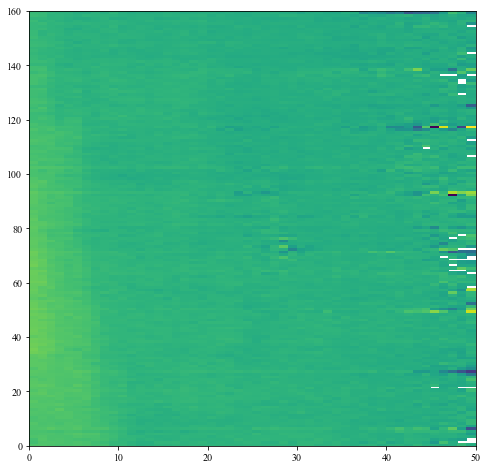

In [136]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
datafile = datafilelist[6]
dataadcp = sio.loadmat(datafile)
lon, lat = dataadcp["AnFLonDeg"], dataadcp["AnFLatDeg"]
NN1, NN2 = 240, 400
#plt.plot(dataadcp["AnLLonDeg"], dataadcp["AnLLatDeg"], 'r--', lw=.2)
u = dataadcp["SerEmmpersec"]
v = dataadcp["SerNmmpersec"]
valex = u.min()
u = np.ma.masked_equal(u, valex, copy=True)
plt.pcolormesh(u[NN1:NN2,:])
plt.show()
plt.close()